--- Top Correlations with Diagnosis ---
Diagnosis              1.000000
UPDRS                  0.398006
Tremor                 0.274370
Rigidity               0.185611
Bradykinesia           0.184042
PosturalInstability    0.147519
Age                    0.065344
Depression             0.059080
Diabetes               0.057067
AlcoholConsumption     0.036699
Name: Diagnosis, dtype: float64

--- Top Negative Correlations (Protective Factors) ---
DietQuality            -0.022992
DiastolicBP            -0.029074
SleepQuality           -0.043295
MoCA                   -0.173104
FunctionalAssessment   -0.225036
Name: Diagnosis, dtype: float64


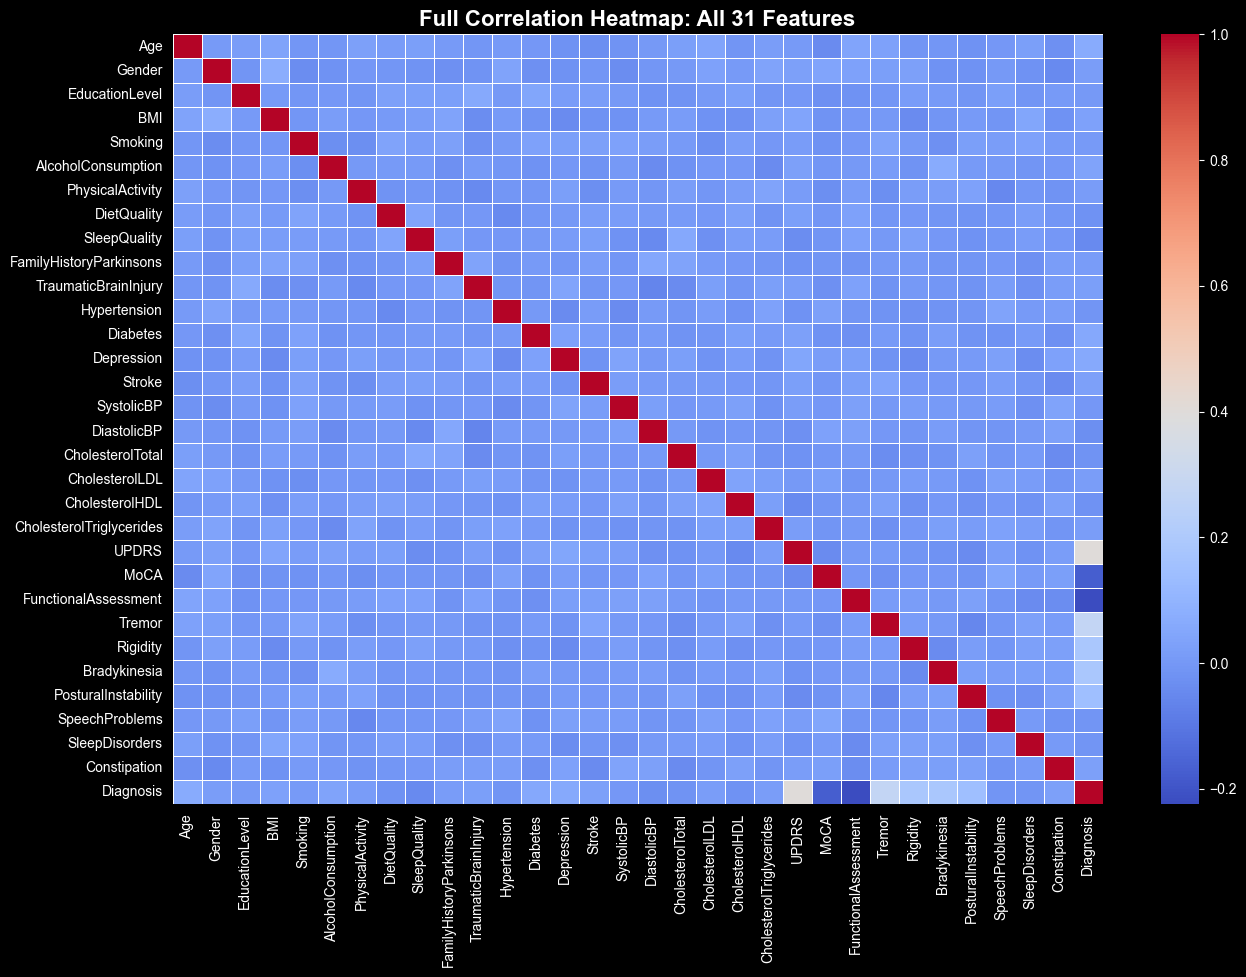

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Load the data
df = pd.read_csv('parkinsons_preprocessed.csv')

# 2. Calculate the correlation matrix for ALL columns
# This shows how every variable relates to every other variable (-1 to 1)
corr_matrix = df.corr()

# 3. Focus: What correlates most with the Diagnosis?
print("--- Top Correlations with Diagnosis ---")
diagnosis_corr = corr_matrix['Diagnosis'].sort_values(ascending=False)
print(diagnosis_corr.head(10)) # Top 10 positive correlations
print("\n--- Top Negative Correlations (Protective Factors) ---")
print(diagnosis_corr.tail(5)) # Top 5 negative correlations

# 4. Visualization: Full Correlation Heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Full Correlation Heatmap: All 31 Features', fontsize=16, fontweight='bold')
plt.show()

/var/folders/3s/zsqbr1753cn9kbp_s9kb_qy00000gn/T/ipykernel_41949/2092257938.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  risk_plot = sns.barplot(x=top_risk_factors.values, y=top_risk_factors.index, palette='Reds_r')


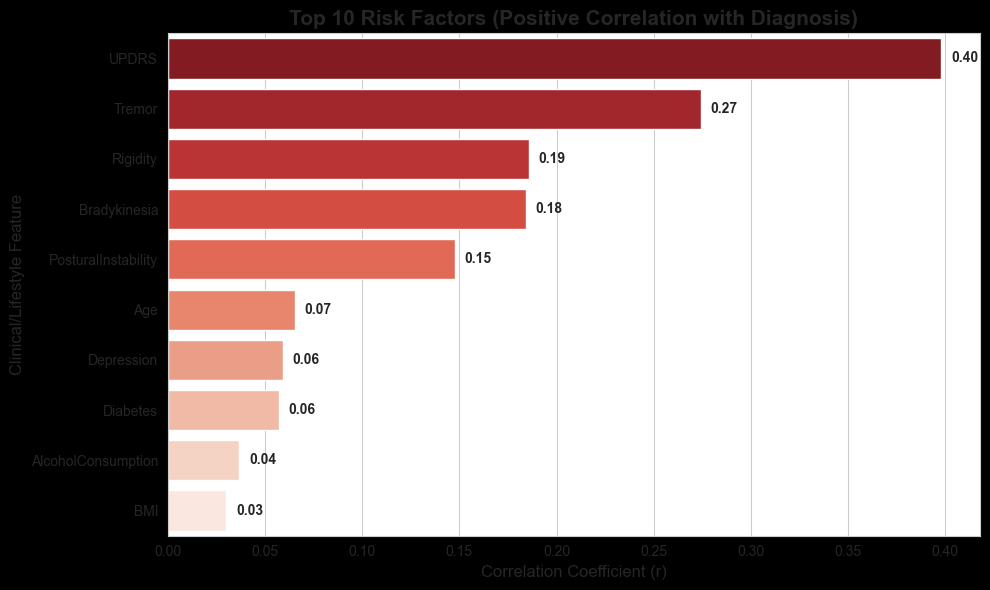

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Load the preprocessed dataset
df = pd.read_csv('parkinsons_preprocessed.csv')

# 2. Calculate the correlation matrix
corr_matrix = df.corr()

# 3. Extract correlations specifically for Diagnosis
# We drop 'Diagnosis' itself to avoid a perfect 1.0 correlation with itself
risk_factors = corr_matrix['Diagnosis'][corr_matrix['Diagnosis'] > 0].drop('Diagnosis', errors='ignore')

# 4. Sort and select the top 10 strongest risk factors (positive correlations)
top_risk_factors = risk_factors.sort_values(ascending=False).head(10)

# 5. Visualization: Create a bar plot using a Red palette
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
risk_plot = sns.barplot(x=top_risk_factors.values, y=top_risk_factors.index, palette='Reds_r')

# Add titles and labels in English for the presentation
plt.title('Top 10 Risk Factors (Positive Correlation with Diagnosis)', fontsize=15, fontweight='bold')
plt.xlabel('Correlation Coefficient (r)', fontsize=12)
plt.ylabel('Clinical/Lifestyle Feature', fontsize=12)

# Annotate values on the bars for clarity
for i, val in enumerate(top_risk_factors.values):
    risk_plot.text(val + 0.005, i, f'{val:.2f}', va='center', fontweight='bold')

plt.tight_layout()
plt.show()

/var/folders/3s/zsqbr1753cn9kbp_s9kb_qy00000gn/T/ipykernel_41949/279527715.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  protect_plot = sns.barplot(x=top_protective_factors.values, y=top_protective_factors.index, palette='Blues_r')


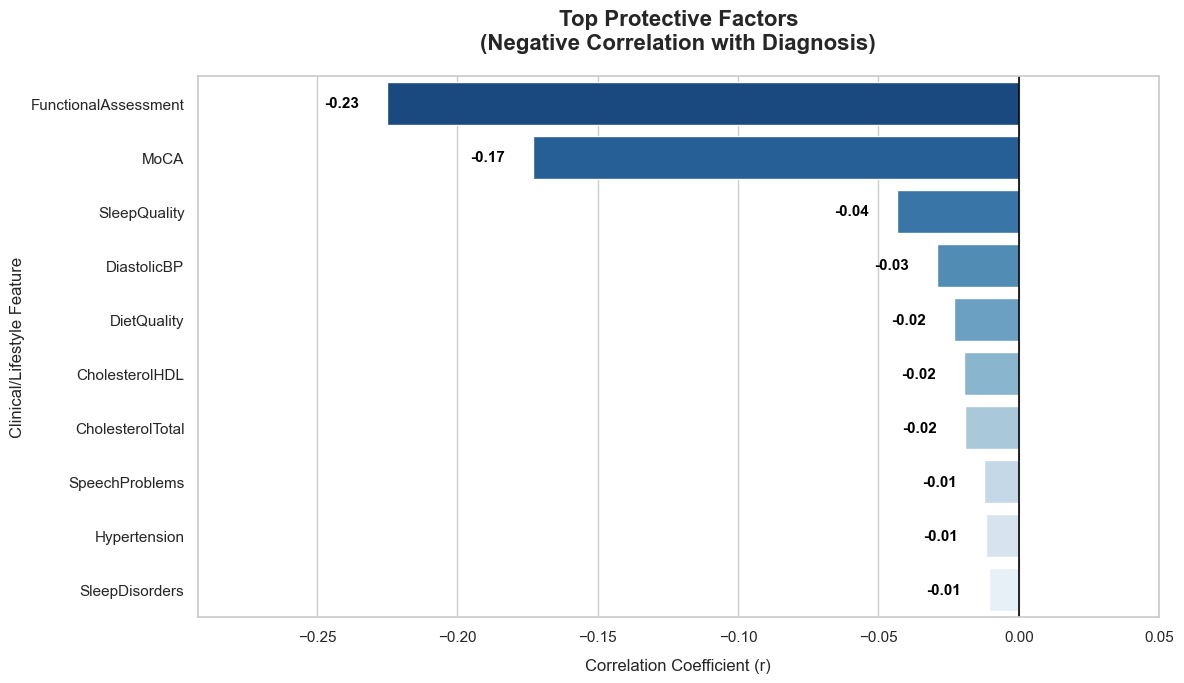

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Load the preprocessed dataset
df = pd.read_csv('parkinsons_preprocessed.csv')

# 2. Calculate the correlation matrix
corr_matrix = df.corr()

# 3. Extract and filter negative correlations for Diagnosis
protective_factors = corr_matrix['Diagnosis'][corr_matrix['Diagnosis'] < 0]
top_protective_factors = protective_factors.sort_values(ascending=True).head(10)

# 4. Visualization: Professional Bar Plot
plt.figure(figsize=(12, 7))
sns.set_theme(style="whitegrid")

# Plotting with a reversed blue palette
protect_plot = sns.barplot(x=top_protective_factors.values, y=top_protective_factors.index, palette='Blues_r')

# FIX: Set X-axis limits to prevent text clipping (adding 30% extra space to the left)
x_min = top_protective_factors.min() * 1.3
plt.xlim(x_min, 0.05) 

# Add titles and labels
plt.title('Top Protective Factors\n(Negative Correlation with Diagnosis)', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Correlation Coefficient (r)', fontsize=12, labelpad=10)
plt.ylabel('Clinical/Lifestyle Feature', fontsize=12)

# FIX: Add a zero line for reference
plt.axvline(0, color='black', linewidth=1.2)

# FIX: Annotate values with professional alignment
for i, val in enumerate(top_protective_factors.values):
    # 'ha=right' places the text to the left of the specified coordinate
    protect_plot.text(val - 0.01, i, f'{val:.2f}', va='center', ha='right', 
                     fontsize=11, fontweight='bold', color='black')

plt.tight_layout()
plt.show()

/tmp/ipykernel_87289/1561973702.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=top_drivers.values, y=top_drivers.index, palette=colors)


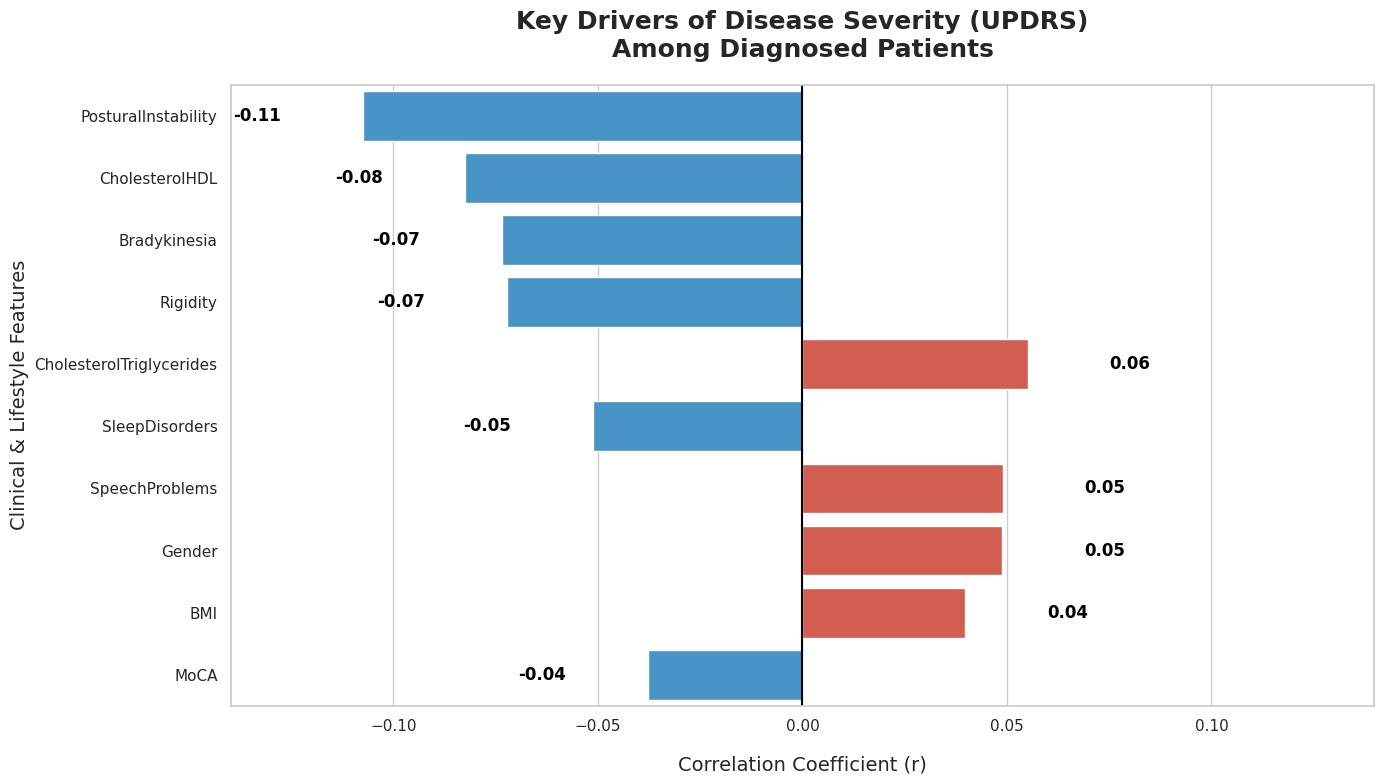

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Load the dataset
df = pd.read_csv('parkinsons_preprocessed.csv')

# 2. Filter: Focus ONLY on diagnosed patients
sick_df = df[df['Diagnosis'] == 1].copy()

# 3. Calculate correlation specifically with UPDRS (Severity)
severity_corr = sick_df.corr()['UPDRS'].drop(['UPDRS', 'Diagnosis'], errors='ignore')

# 4. Take the top 10 influential factors
top_drivers = severity_corr.reindex(severity_corr.abs().sort_values(ascending=False).index).head(10)

# 5. Professional Visualization
plt.figure(figsize=(14, 8))
sns.set_theme(style="whitegrid")

# Create a color list: Red for positive (worsens), Blue for negative (improves)
colors = ['#e74c3c' if x > 0 else '#3498db' for x in top_drivers]

# Create the bar plot
ax = sns.barplot(x=top_drivers.values, y=top_drivers.index, palette=colors)

# Fix: Adjust X-axis limits to prevent text clipping
limit = max(abs(top_drivers.values)) * 1.3
plt.xlim(-limit, limit)

# Fix: Professional labeling and zero-line
plt.axvline(0, color='black', linewidth=1.5, linestyle='-')
plt.title('Key Drivers of Disease Severity (UPDRS)\nAmong Diagnosed Patients', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Correlation Coefficient (r)', fontsize=14, labelpad=15)
plt.ylabel('Clinical & Lifestyle Features', fontsize=14)

# Fix: Place text labels properly without overlapping axis names
for i, val in enumerate(top_drivers.values):
    # If the value is positive, put text to the right. If negative, to the left.
    align = 'left' if val > 0 else 'right'
    offset = 0.02 if val > 0 else -0.02
    ax.text(val + offset, i, f'{val:.2f}', va='center', fontsize=12, 
            fontweight='bold', color='black', ha=align)

plt.tight_layout()
plt.show()